In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv


# Import Data

In [3]:
data = pd.read_csv('/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv')

data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Everything looks smooth, all integers--except the `RiskLevel` column. 

We should encode this column

In [6]:
data['RiskLevel'] = data['RiskLevel'].apply(lambda x: 3 if x=='high risk' else( 2 if x=='mid risk' else 1))
data['RiskLevel'].unique()

array([3, 1, 2])

# EDA

In [7]:
data.shape[0]

1014

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

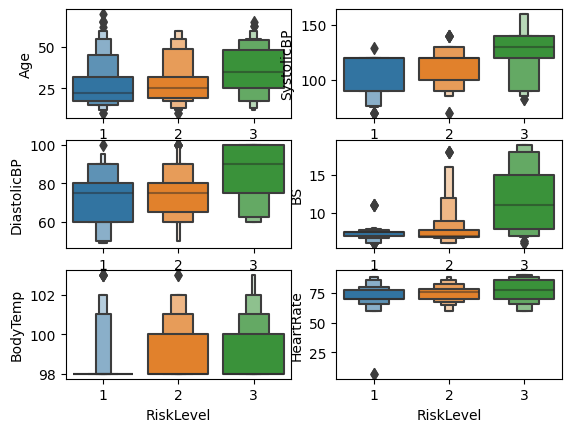

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(3,2)
row_dict = {0: 0, 1:0, 2:1, 3:1, 4:2, 5:2}
for i in range(6):
    column = data.columns[i]
    col = int(not i%2==0)
    sns.boxenplot(x='RiskLevel', y=column, data=data, ax=ax[row_dict[i], col])

In [44]:
from sklearn.feature_selection import f_classif 

y = data.pop('RiskLevel')
_, pval = f_classif(data,y)
pval

array([6.82983841e-020, 7.29219386e-039, 7.83805034e-035, 2.41562570e-111,
       9.36231862e-008, 1.96110705e-009])

All features are significant to the target. 

Let's try KNN as baseline model to see if this shall work

# Baseline Model: KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score

X = minmax_scale(data)

In [54]:
knn = KNN(n_neighbors=3)

scores = cross_val_score(knn, X, y, scoring = 'roc_auc_ovo')

In [55]:
scores

array([0.94222686, 0.85368919, 0.88634683, 0.88365128, 0.90774011])

In [56]:
print(np.mean(scores))

0.8947308519846315
